In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)
  # Set the x-axis label
  axes.set_xlabel(xlabel)
  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)
  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)
  
def plot_timeseries(axes, x, y, labels):
    # Create a dictionary that maps each unique label to a specific color
    label_colors = {'unclassified': 'gray', 'Production': 'green', 'Power-down': 'orange', 'Non-production': 'red', 'Power-up': 'blue'}
    # Get a list of unique labels in the 'labels' column
    unique_labels = np.unique(labels)
    # Plot each data point separately with the appropriate color
    for label in unique_labels:
        mask = labels == label
        color = label_colors[label]
        axes.plot(x[mask], y[mask], color=color, label=label)
    # Set the x-axis label
    axes.set_xlabel('X Label')
    # Set the y-axis label
    axes.set_ylabel('Y Label')
    # Set the legend
    axes.legend()



In [18]:
paths = []
dfs = []
df = pd.read_csv('../data_new/train_data_v3.csv')
paths = df['Measure'].unique()
paths

array(['Mech_Svc_AHU', 'Sub - Main M2', 'FB1 - Main 1L', 'AB3 - Main 3L',
       'Sub - Feeder F04', 'Sub - Feeder F02', 'Sub - Feeder F03',
       'MSB1 - Main 1L', 'BS4 - Main 4R', 'Sub - Feeder F08',
       'AB2 - Main 2R', 'Paint_AHU', 'BS1 - Main 1L', 'AB3 - Main 3R',
       'BS3 - Main 3L', 'BS2 - Main 2L', 'Sub - Feeder F10',
       'FB3 - Main 3L', 'AB1 - Main 1L', 'Sub - Feeder F01',
       'BS3 - Main 3R', 'BS4 - Main 4L', 'BS2 - Main 2R'], dtype=object)

In [19]:
i = 0
for path in paths:
    dfs.append(pd.read_csv('../data_new/unsupervised/' + path + '.csv'))
    i += 1

In [20]:
def plot_timeseries(axes, x, y, labels):
    # Create a dictionary that maps each unique label to a specific color
    label_colors = {'unclassified': 'gray', 'Production': 'green', 'Power-down': 'orange', 'Non-production': 'red', 'Power-up': 'blue'}
    # Get a list of unique labels in the 'labels' column
    unique_labels = np.unique(labels)
    # Plot each data point separately with the appropriate color
    for label in unique_labels:
        mask = labels == label
        color = label_colors[label]
        axes.plot(x[mask], y[mask], color=color, label=label)
    # Set the x-axis label
    axes.set_xlabel('X Label')
    # Set the y-axis label
    axes.set_ylabel('Y Label')
    # Set the legend
    axes.legend()

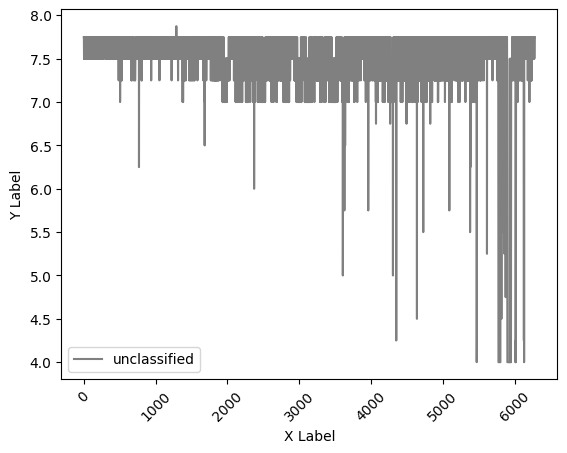

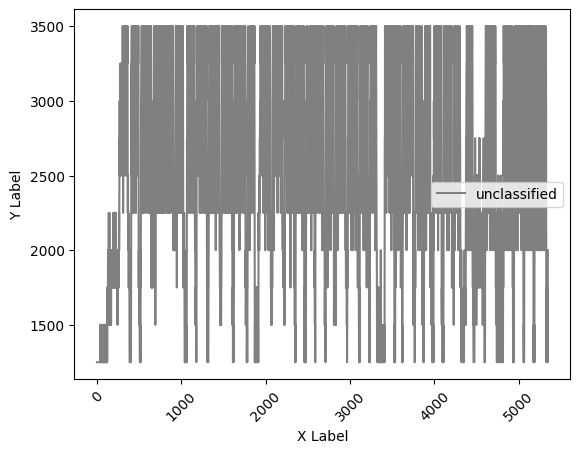

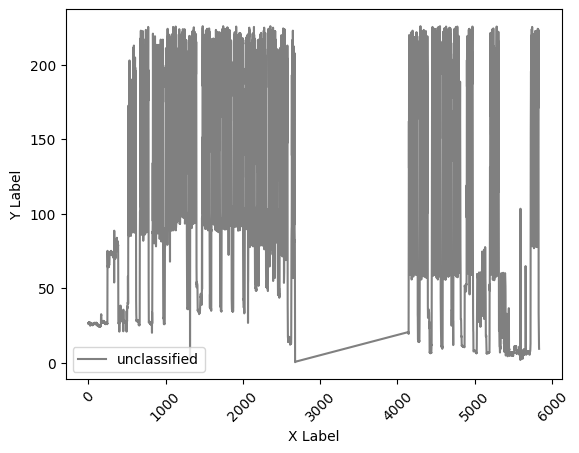

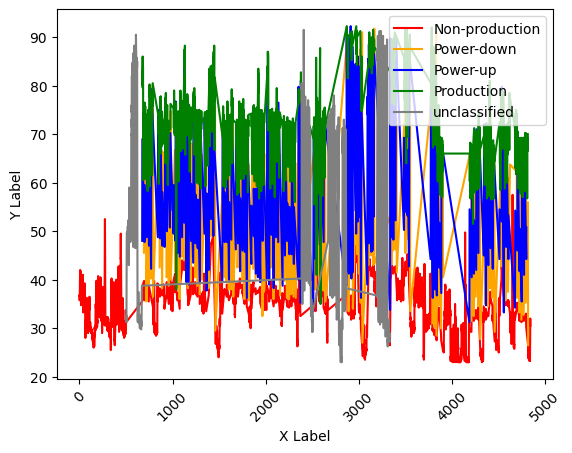

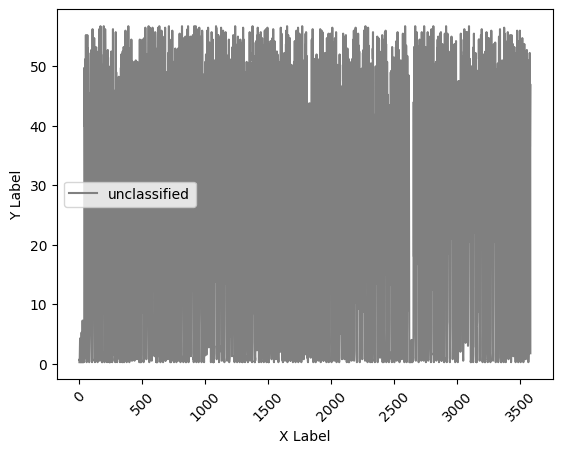

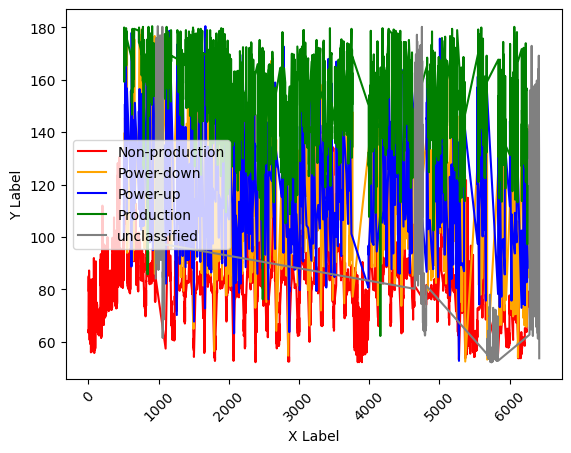

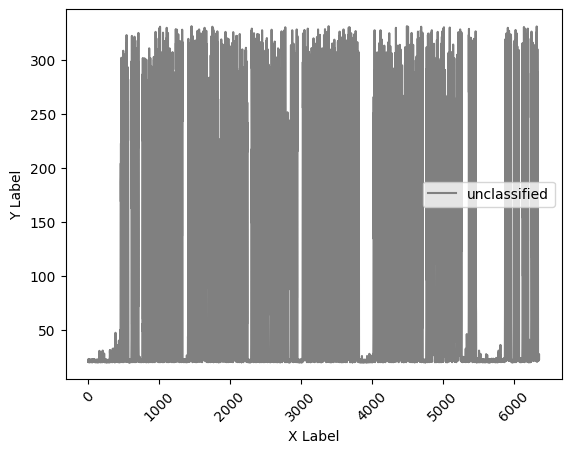

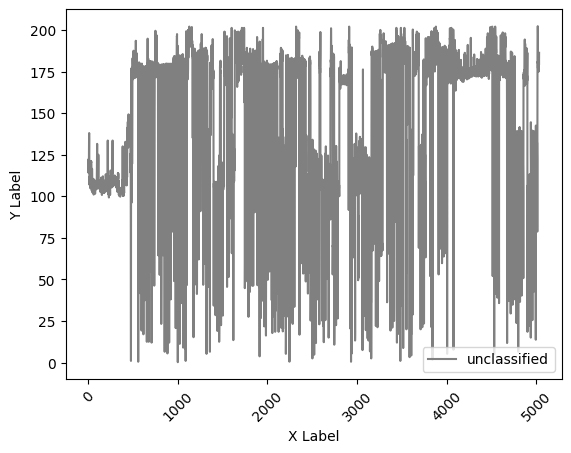

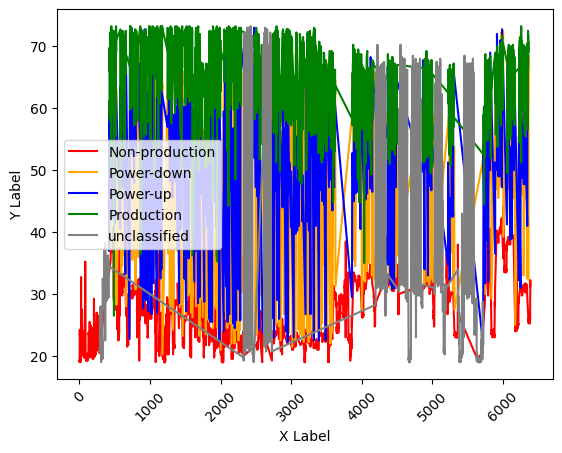

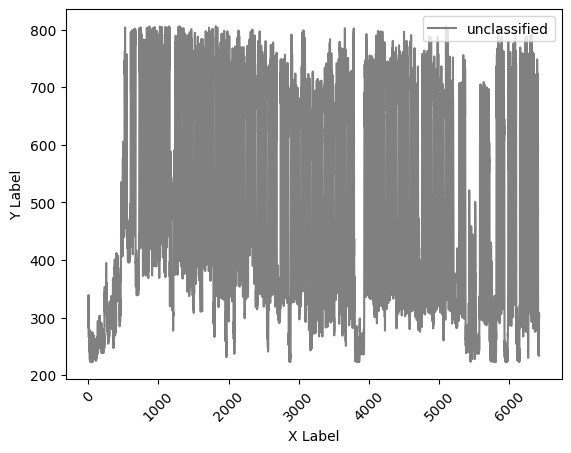

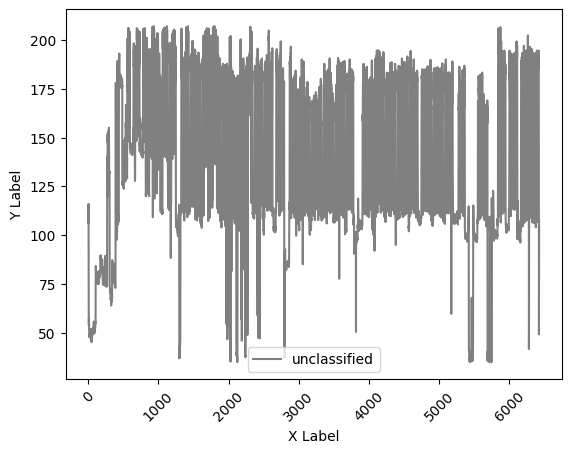

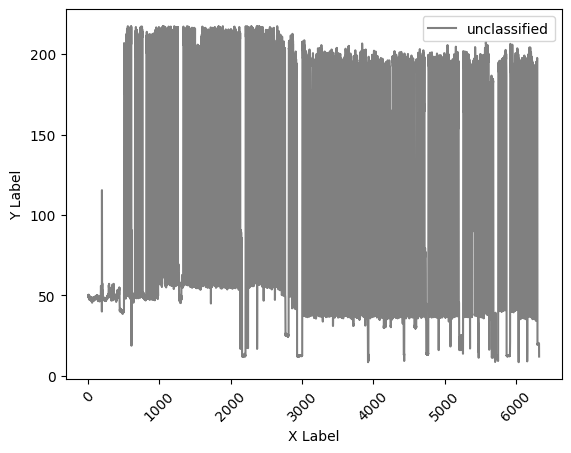

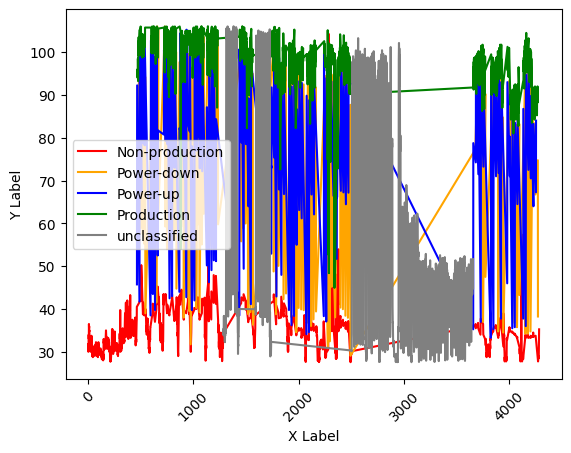

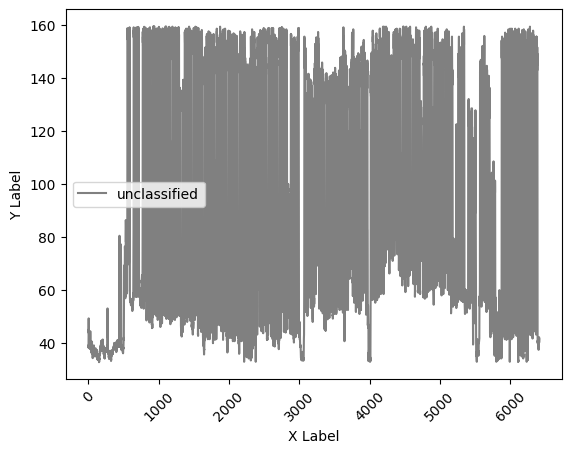

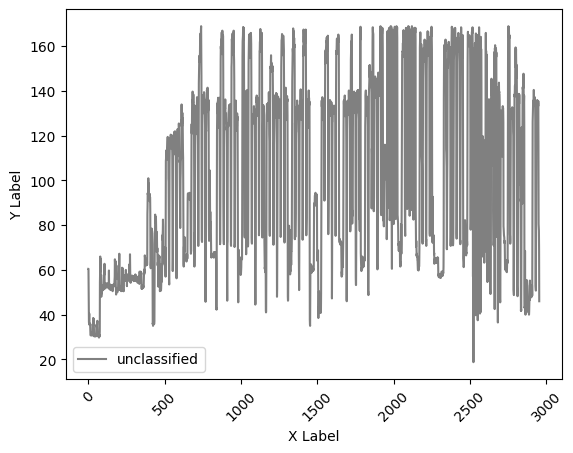

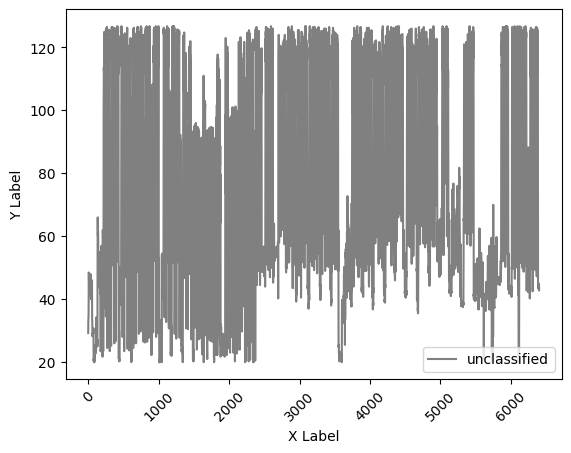

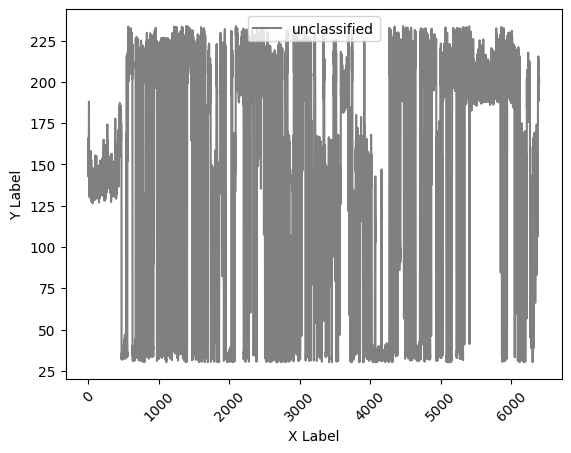

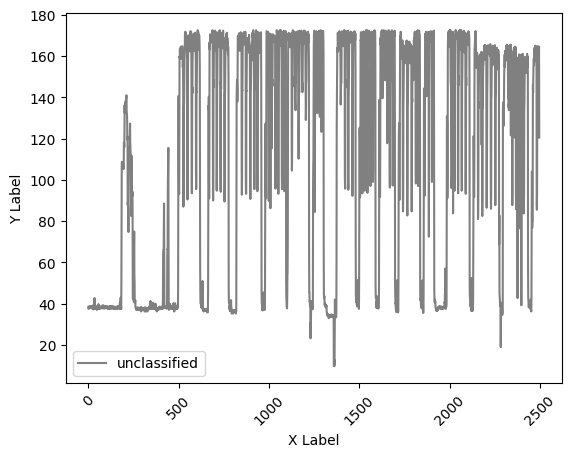

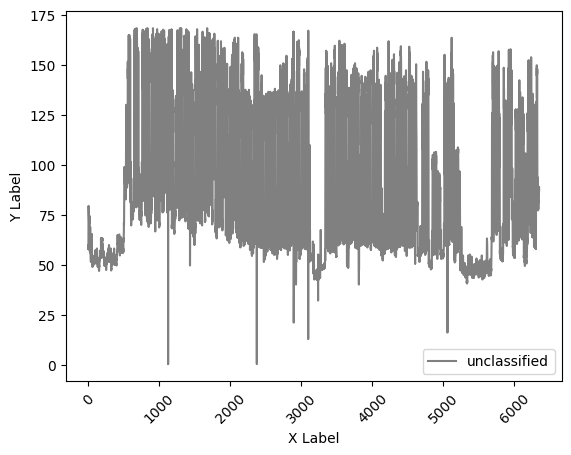

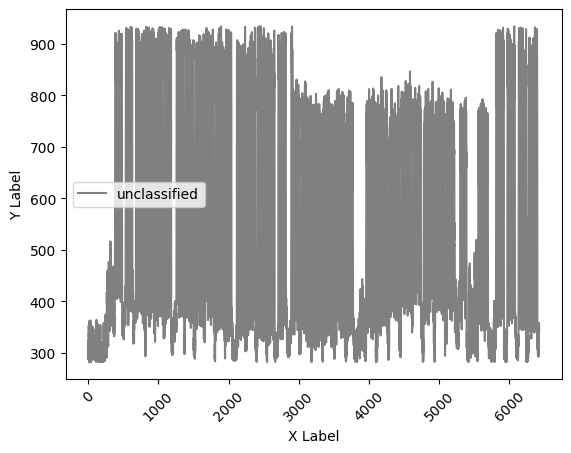

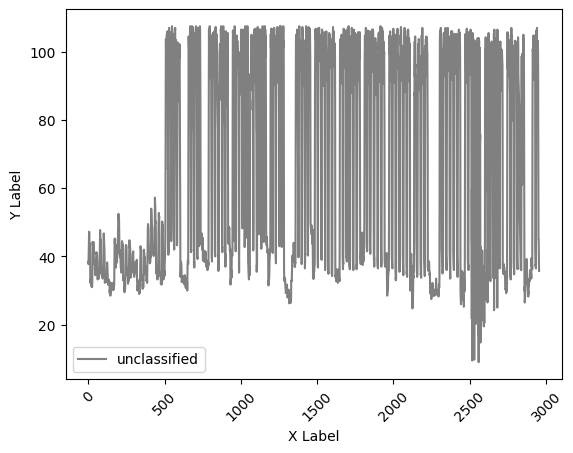

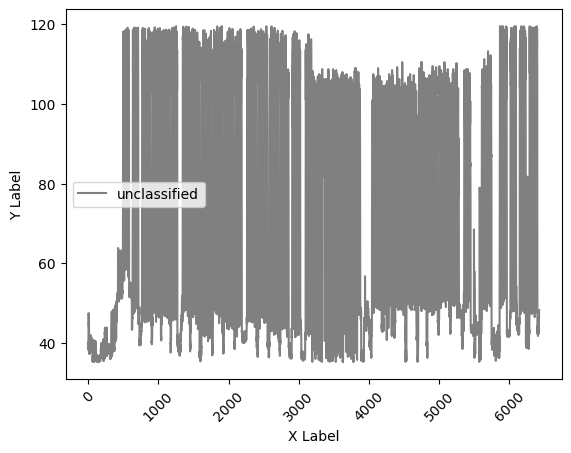

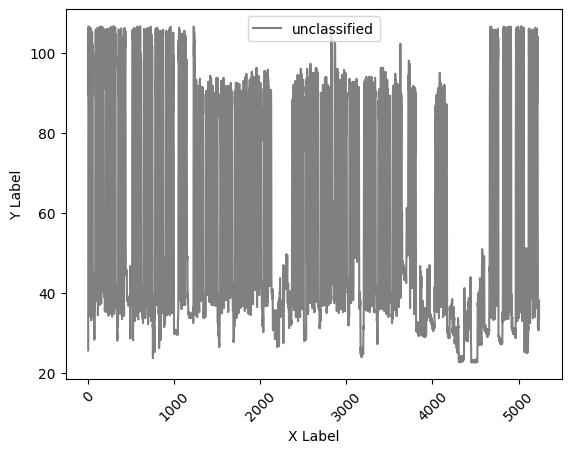

In [21]:
for cur_df in dfs:
    fig, ax = plt.subplots()
    # Plot the CO2 levels time-series in blue
    plot_timeseries(ax, cur_df.index, cur_df["kWh"], labels=cur_df['label'])
    plt.xticks(rotation=45)
    plt.show()

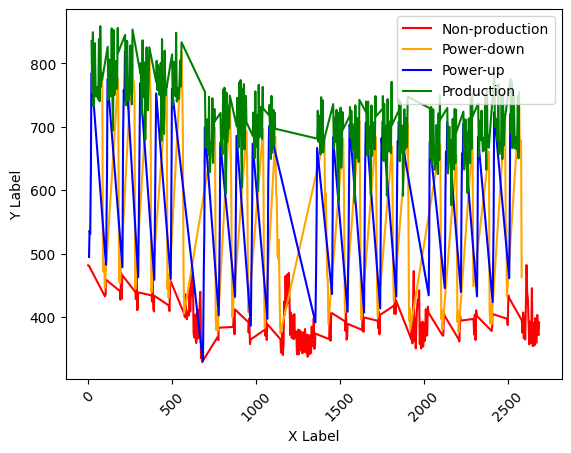

In [4]:
cur_df = pd.read_csv('../data_new/holdout_v3.csv')

fig, ax = plt.subplots()
# Plot the CO2 levels time-series in blue
plot_timeseries(ax, cur_df.index, cur_df["kWh"], labels=cur_df['label'])
plt.xticks(rotation=45)
plt.show()